# High Pass Spatial Filters
> 0712238 Yan-Tong Lin, for DIP2021spring HW3

## DIP Homework Chapter 3_3
1. Please design a highboost method including the Sobel and Laplacian filter in pp.183-195 to enhance the image, ‘bodybone.bmp’ as Fig. 3.49 (e). Please describe the your highboost filter, procedures, final enhanced image and print out the source code. (10)
2. Repeat (1) steps for the image ‘fish.jpg’. (10)
3. Please comment and compare your two designed filters and results.(10)

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, Math, Latex
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from scipy import signal
from scipy import misc
import cv2 as cv

In [3]:
cv.__version__

'4.5.1'

## Original Images

(1463, 915, 3)

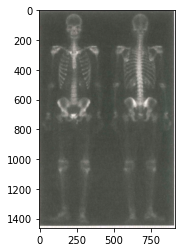

In [4]:
img = cv.imread('Bodybone.bmp')
plt.imshow(img, 'gray')
np.asarray(img).shape

(312, 1052, 3)

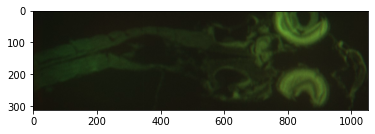

In [5]:
img = cv.imread('fish.jpg')
plt.imshow(img, 'gray')
np.asarray(img).shape

## Code for Demo
* The demo code behaves differently dpending on the parameters taken, and is thus suitable for all scenes.

### Algorithm for highboosting
1. Denoise with Gaussian filtering
    * $\hat{f}= \text{Gaussian} \star f$
2. Capture the high-pass filtered signals $g$
    * $g= \text{Highpass} \star \hat{f}$
3. $f'=\hat{f}+cg$
    * where $f'$ is the processed image
    * here we take $c=2$ for high-boosting.

### Laplacian filter
* $\nabla^2 f= \frac {\partial^2 f} {\partial x ^2} + \frac {\partial^2 f} {\partial y ^2}$
* $\nabla^2 f(x,y) = \sum_{dx,dy}f(x+dx, y+dy)-nf(x,y)$
    * where $dx,dy$s take values from 4/8 directional sets and $n =4, 8$
* $g(x,y)=\nabla^2 f(x,y)$

$$
\text{filter for 4-directional dx, dy} = \left(
\begin{matrix}
0 & -1 & 0 \\
-1 & 4 & -1 \\
0 & -1 & 0 \\
\end{matrix}
\right) \\
$$
$$
\text{filter for 8-directional dx, dy} = \left(
\begin{matrix}
-1 & -1 & -1 \\
-1 & 8 & -1 \\
-1 & -1 & -1 \\
\end{matrix}
\right) \\
$$

### Sobel filter
* $M=\|\nabla f\|= (f_x^2+f_y^2)^{\frac 1 2}$
    * approx with $\|f_x\|+\|f_y\|$
* $g(x,y)=M(x,y)$

$$
\text{filter for }f_x = \left(
\begin{matrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 \\
\end{matrix}
\right) \\
$$
$$
\text{filter for }f_y = \left(
\begin{matrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1 \\
\end{matrix}
\right) \\
$$

In [6]:
def normed(img):
    return cv.normalize(img, img, 0, 255, cv.NORM_MINMAX)

def demo(imageName, filterName, ksize=3, blur_ksize=5):
    # configs
    ddepth = cv.CV_16S
    # Load Image
    img = cv.imread(imageName, cv.IMREAD_COLOR)
    # Convert to Gray
    grayImage = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Use Gaussian for noise elimination
    grayImage = cv.GaussianBlur(grayImage,(blur_ksize ,blur_ksize),0)

    # Apply Sobel/Laplacian Operator
    if filterName == 'Sobel':
        grad_x = cv.Sobel(grayImage, ddepth, 1, 0, ksize=ksize)
        grad_y = cv.Sobel(grayImage, ddepth, 0, 1, ksize=ksize)
        # normalized to int8
        abs_x = cv.convertScaleAbs(grad_x)
        abs_y = cv.convertScaleAbs(grad_y)
        edge = cv.addWeighted(abs_x, 0.5, abs_y, 0.5, 0) # use approx not squared
        enhanced = cv.addWeighted(grayImage, 1.0, edge, 2.0, 0)
    elif filterName == 'Laplacian':
        dst = cv.Laplacian(grayImage, ddepth, ksize=ksize)
        edge = cv.convertScaleAbs(dst)
        enhanced = cv.addWeighted(grayImage, 1.0, edge, 2.0, 0)
    edge_dispay = normed(edge)
    
    # Display
    n = 3
    titles = ['f', '$g= $' + filterName + '$\star\hat{f}$', '$\hat{f}+2g$']
    images = [grayImage, edge_dispay, enhanced]
    fig, axs = plt.subplots(1, n, figsize=[10, 10])
    
    for i in range(len(titles)):
        axs[i].imshow(images[i], 'gray')
        axs[i].set_title(titles[i])
        axs[i].set_xticks([]), axs[i].set_yticks([])
    plt.show()
    return 

## Results

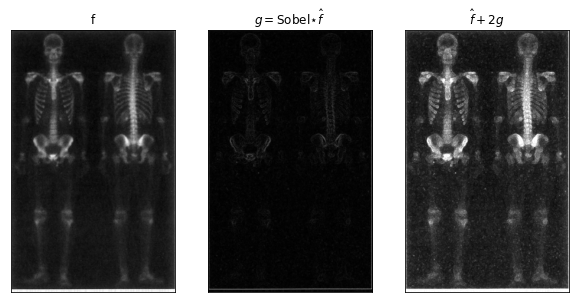

In [7]:
demo('Bodybone.bmp', 'Sobel', ksize=3, blur_ksize=5)

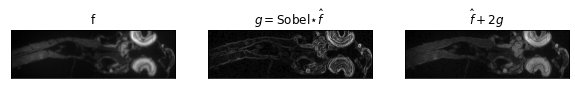

In [8]:
demo('fish.jpg', 'Sobel', ksize=3, blur_ksize=5)

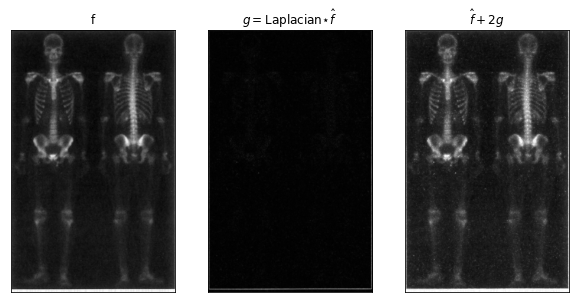

In [9]:
demo('Bodybone.bmp', 'Laplacian', ksize=3, blur_ksize=5)

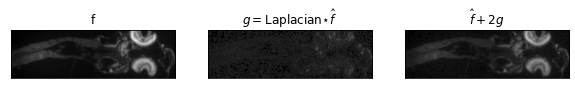

In [10]:
demo('fish.jpg', 'Laplacian', ksize=3, blur_ksize=5)

## Comments and Comparisons
* Before applying highpass kernels, we should use smoothing methods to reduce the influence of the noise.
* We can see that the highpass operators successfully extract some of the borders from the original pictures.
* I tried different kernel sizes, but if the kernel size is increased to 5, the processed image will be noisy.
    * By increasing the kernel size, we are taking farther points into account, which can result in a creation of artifacts.

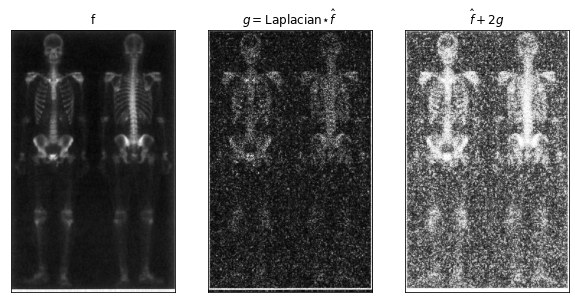

In [11]:
demo('Bodybone.bmp', 'Laplacian', 5, 5)